In [1]:
%matplotlib inline
import keras
import pandas as pd


Using Theano backend.


In [2]:
path = r'Iris.csv'
data = pd.read_csv(path)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


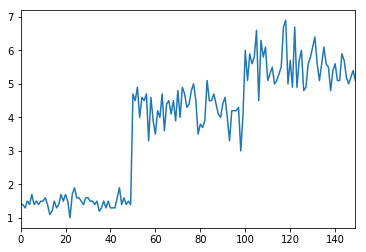

In [3]:
data['PetalLengthCm'].plot()

In [4]:
train=data.sample(frac=0.5,random_state=200)
test=data.drop(train.index)

In [5]:
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa


In [6]:
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
122,123,7.7,2.8,6.7,2.0,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
Sorted = data.sort_values(['Id'], ascending=True)

In [9]:
Sorted

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
Testorder = test.sort_values(['Id'], ascending=True)

In [11]:
Testorder

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa


In [12]:
Trainorder = train.sort_values(['Id'], ascending=True)

In [13]:
Trainorder

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,3,4.7,3.2,1.3,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
